In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.0 MB 6.3 MB/s eta 0:01:00
   ---------------------------------------- 0.6/377.0 MB 5.9 MB/s eta 0:01:04
   ---------------------------------------- 0.8/377.0 MB 5.8 MB/s eta 0:01:05
   ---------------------------------------- 1.1/377.0 MB 6.2 MB/s eta 0:01:01
   ---------------------------------------- 1.4/377.0 MB 5.8 MB/s eta 0:01:05
   ---------------------------------------- 1.6/377.0 MB 5.


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Importa las librerías necesarias para aplicar preprocesamiento de datos,
visualización y creación de un modelo de red neuronal feedforward con Keras y
Tensorflow. Importa la base de datos Customer Churn.csv y realiza el
preprocesamiento de los datos

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Cargar los datos
data = pd.read_csv('Customer Churn.csv')


print(data.head())


   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3    

Vamos a realizar el pre-procesamiento de datos.
*   Verificar datos faltantes y tipos de datos.
*   Convertir datos categóricos a numéricos si es necesario.
*   Normalizar las características.

In [9]:
# Verificar datos faltantes
print(data.isnull().sum())

# Revisar las columnas
print(data.info())

# Estandarizar las variables regresoras
features = data.drop(columns=['Churn'])
target = data['Churn']

scaler = StandardScaler() #Inicializamos "escalador"
features_scaled = scaler.fit_transform(features) #Estandarizaremos las variables regresoras para garantizar que todas las características tengan una media de 0 y una desviación estándar de 1

# Combinar de nuevo con la etiqueta de clase para un conjunto de datos preprocesado completo
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['Churn'] = target.values



Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-nul

2. Analiza la distribución de “Subscription Length” para cada clase (Churn),
describiendo si hay alguna incidencia de esta variable en la renuncia o no. Realiza
una estandarización de las variables regresoras

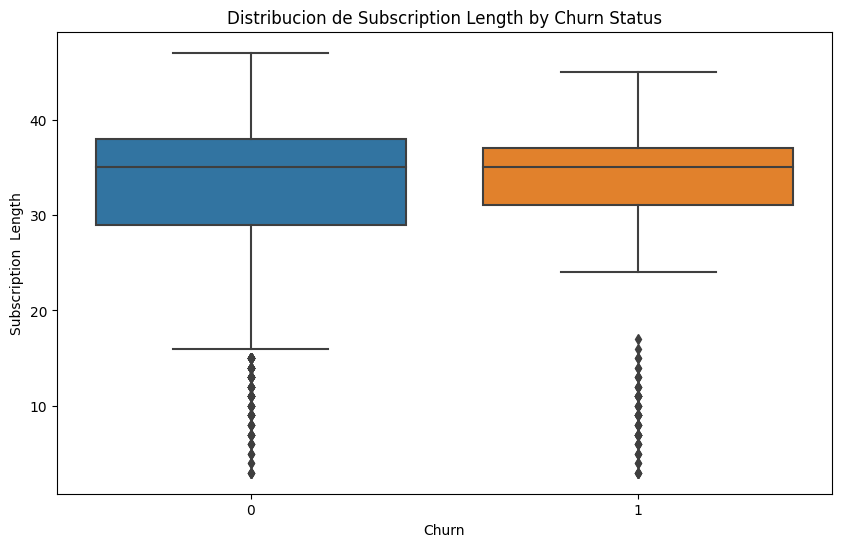

In [13]:
# Análisis de "Subscription Length" para cada clase
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Subscription  Length', data=data)
plt.title('Distribucion de Subscription Length by Churn Status')
plt.show()


Se nos muestra la duración de sucripción para clientes que renunciaron y los que no.
* Los clientes que no han renunciado (Churn = 0) tienen una mediana de duración de suscripción alrededor de 35 meses, con un rango intercuartil aproximadamente de 25 a 40 meses.
* Los clientes que han renunciado (Churn = 1) tienen una mediana ligeramente más baja, también alrededor de 30 a 35 meses, con un rango intercuartil de aproximadamente 25 a 40 meses.
 Tienen una media similar y también valores atípicos hacia la parte inferior, esto nos indica que algunos clientes tienen suscripciones más cortas.
 En resumen y para concluir; se presume que la duración de la suscripción por sí sola puede no ser un indicador fuerte de la renuncia. Otros factores podrían estar influyendo más significativamente en la decisión de los clientes de cancelar su suscripción

3. Muestra la frecuencia de cada clase y realiza un balanceo de clase usando SMOTE.
Divida el conjunto de datos en entrenamiento y test, considerando para este último
un 33%.

In [14]:
# Frecuencia de cada clase
print(data['Churn'].value_counts())

# Balanceo de clase con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_scaled, target)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42) #Dividimos el conjunto de train y test con las clases equlibiradas.



Churn
0    2655
1     495
Name: count, dtype: int64


El desbalance de clases puede causar problemas en el entrenamiento de modelos de machine learning, ya que los modelos pueden aprender a favorecer la clase "mayoritaria" e ignorar la clase #### minoritaria, lo que resulta en un rendimiento deficiente para la predicción de la clase minoritaria.
 SMOTE crea instancias sinteticas para equilibrar las clases.
 

In [15]:
# Mostrar la nueva distribución de clases
print("Distribución de clases después de SMOTE:")
print(pd.Series(y_resampled).value_counts())

Distribución de clases después de SMOTE:
Churn
0    2655
1    2655
Name: count, dtype: int64


Ahora están equilibradas y funcionará de mejor manera este y todo algoritmo de machine laerning.

4. Entrene un modelo RandomForest con hiper parámetros por defecto, usando el
conjunto de entrenamiento anterior y muestra la métrica F1-Score para ambas
clases en el conjunto de test. Captura y muestra las siete características más
importantes detectadas por el modelo RandomForest.

F1-Score: 0.9738636363636364
Las siete características más importantes son: Index(['Status', 'Frequency of use', 'Complains', 'Seconds of Use',
       'Subscription  Length', 'Customer Value', 'Distinct Called Numbers'],
      dtype='object')


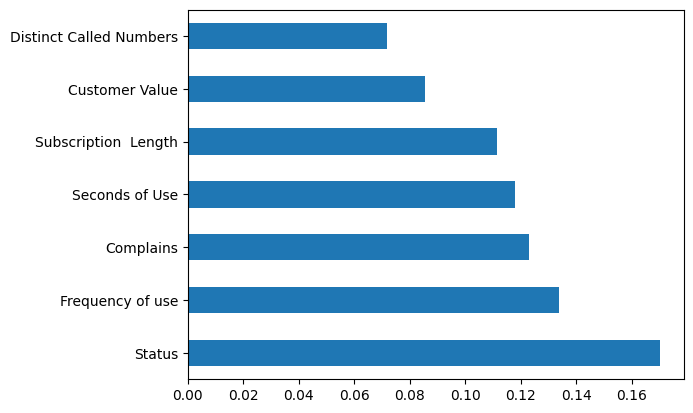

In [16]:
# Entrenar el modelo RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Identificar las características más importantes
feature_importances = rf.feature_importances_
important_features = pd.Series(feature_importances, index=features.columns).nlargest(7).index
print("Las siete características más importantes son:", important_features)

# Mostrar las características más importantes
importances = pd.Series(rf.feature_importances_, index=features.columns)
importances.nlargest(7).plot(kind='barh')
plt.show()


En este caso usamos el RandomForest para rpedecir si un cliente va a renunciar o no. (Churn)

el gráfico nos muestra las 7 características más importantes.
 ( el f1-score es de)

5. Usando las siete características encontradas anteriormente, filtra el conjunto de
entrenamiento y entrena un modelo de red neuronal feedforward con sólo una capa
oculta. Para esto debes definir una función de activación adecuada, tanto para la
capa oculta como para la capa de salida, la cantidad de neuronas a usar, la tasa de
aprendizaje (learning_rate), y la cantidad de épocas deben ser ajustadas
manualmente. Como optimizador, utiliza el Descenso del Gradiente Estocástico. Los
ajustes manuales de los hiper parámetros deben ser tales que la métrica AUC sea
mayor al 90%. Muestra finalmente ROC y su AUC.

Importante
* Capa de Entrada: Donde se ingresan los datos.
* Capa Oculta: Procesa la información y aprende patrones.
* Capa de Salida: Hace la predicción final

Epoch 1/50


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6408 - loss: 0.6562 - val_accuracy: 0.8702 - val_loss: 0.3609
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8764 - loss: 0.3323 - val_accuracy: 0.8712 - val_loss: 0.3015
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8805 - loss: 0.2797 - val_accuracy: 0.8817 - val_loss: 0.2816
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9032 - loss: 0.2537 - val_accuracy: 0.8885 - val_loss: 0.2727
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8947 - loss: 0.2541 - val_accuracy: 0.8885 - val_loss: 0.2678
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2323 - val_accuracy: 0.8885 - val_loss: 0.2648
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9047 - loss: 0.2381 - val_accuracy: 0.8885 - val_loss: 0.2626
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9040 - loss: 0.2399 - val_accuracy: 0.8885 - val_

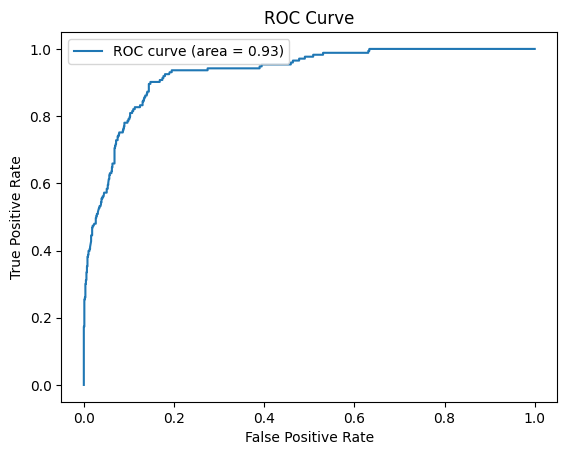

In [38]:
#pasos a seguir
# 1. Importar y cargar los datos, seleccionando las siete características más importantes.
# 2. Dividir los datos en conjuntos de entrenamiento y prueba para evaluar el modelo.
# 3. Estandarizar las características para mejorar el rendimiento del modelo.
# 4. Definir una red neuronal con una capa oculta que usa 'relu' y una capa de salida que usa 'sigmoid'.
# 5. Compilar el modelo con Descenso del Gradiente Estocástico (SGD) y una tasa de aprendizaje ajustable.
# 6. Entrenar el modelo en múltiples épocas para mejorar la precisión.
# 7. Calcular el AUC y generar la curva ROC para evaluar el rendimiento del modelo.


# Seleccionar las siete características importantes
important_features = ['Status', 'Frequency of use', 'Complains', 'Seconds of Use',
                      'Subscription  Length', 'Customer Value', 'Distinct Called Numbers'] #las puse de manera "Manual" ya que de otra forma me daba error
 
# Filtrar el conjunto de datos
X_resampled = data[important_features]
y_resampled = data['Churn']  # Etiqueta de clase

# Dividir el conjunto de datos en entrenamiento y prueba (67% y 33% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal feedforward
model = Sequential()
# Capa oculta con 10 neuronas y activación 'relu' , la capa oculta:  Procesa la información y aprende patrones.
model.add(Dense(10, input_dim=len(important_features), activation='relu'))
# Capa de salida con activación 'sigmoid', la capa de salida Hace la predicción final.
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo usando Descenso del Gradiente Estocástico (SGD)
learning_rate = 0.01
model.compile(optimizer=SGD(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 50  # Ajusta el número de épocas según sea necesario
history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_data=(X_test, y_test))

# Predecir las probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test).flatten()

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {roc_auc}")

# Generar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()



El modelo ha logrado un AUC de 0.93, lo cual es excelente y muestra que el modelo tiene una buena capacidad para distinguir entre las clases.

Conceptos utilizados:

* Red Neuronal Feedforward: Es un modelo de aprendizaje automático que utiliza capas de neuronas para procesar información y hacer predicciones. En este caso, tiene una capa oculta con 10 neuronas.
* Función de Activación: relu (rectified linear unit) es utilizada en la capa oculta para introducir no linealidades, mientras que sigmoid es usada en la capa de salida para predecir probabilidades en problemas de clasificación binaria.
* Optimización con SGD: El Descenso del Gradiente Estocástico es un método para ajustar los pesos del modelo minimizando la función de pérdida (binary_crossentropy en este caso) mediante pequeñas actualizaciones en cada paso.
* AUC y Curva ROC: Son métricas de evaluación que indican la capacidad del modelo para diferenciar entre las clases. Un AUC alto significa que el modelo es muy efectivo en esta tarea.